In [2]:
import random
import csv
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
from __future__ import division
from pandas.tools.plotting import scatter_matrix, andrews_curves
from sklearn.preprocessing import MinMaxScaler
from attribute_features import *
from sklearn.decomposition import PCA, FactorAnalysis, KernelPCA

matplotlib.style.use('ggplot')
%load_ext autoreload
%matplotlib inline  


In [ ]:
nodes_info = pd.read_csv("../data/node_information.csv", header= None,\
 names=["Id", "year", "title", "authors", "journal", "abstract"],\
 sep=",",index_col = "Id", encoding = 'utf-8')
# Parsing authors and their affiliations
fix_auth_aff(nodes_info)

In [ ]:
print nodes_info.values[21]

In [ ]:
years = np.arange(1992,2005)
nodes_info["year"].plot(kind="hist",bins=years,color='k',alpha=0.5)
plt.xticks(years[:-1]+.5,years[:-1])
plt.savefig("../figures/articles_years.pdf",bbox_inches='tight')


In [ ]:
plt.figure(figsize=(5,7))
journals=pd.get_dummies(nodes_info["journal"]).sum()
journals["Unknown"] = nodes_info["journal"].isnull().sum()
journals.sort_values(ascending=False)[:30].plot(kind="barh",color='k',alpha=0.5)
plt.gca().set_xscale("log")
plt.xlabel('Frequency')
plt.savefig("../figures/articles_journals.pdf",bbox_inches='tight')


# Citations graph

In [ ]:
G = nx.read_edgelist("../data/G_articles.edgelist",encoding='utf-8')
G_nodes = G.nodes()
# Degree
degree_sequence = G.degree().values()
print "Min degree: ", np.min(degree_sequence)
print "Least connected :", G_nodes[np.argmin(degree_sequence)]
print "Max degree: ", np.max(degree_sequence)
print "Most connected :", G_nodes[np.argmin(degree_sequence)]
print "Least connected :", G_nodes[np.argmax(degree_sequence)]
print "Median degree: ", np.median(degree_sequence)
print "Mean degree: ", np.mean(degree_sequence)

# Degree histogram
y=nx.degree_histogram(G)
plt.figure(1)
plt.loglog(y,'b-',marker='o',alpha=0.5,color='k')
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.draw()
plt.savefig("../figures/G_degrees.pdf",bbox_inches='tight')

# Authors graph

In [ ]:
GAC = nx.read_edgelist("../data/G_authors_citations.edgelist",encoding='utf-8')
GAC_nodes = GAC.nodes()
# Degree
degree_sequence = GAC.degree().values()
print "Min degree: ", np.min(degree_sequence)
print "Max degree: ", np.max(degree_sequence)
print "Median degree: ", np.median(degree_sequence)
print "Mean degree: ", np.mean(degree_sequence)
print "Least connected :", GAC_nodes[np.argmin(degree_sequence)]
print "Most connected :", GAC_nodes[np.argmax(degree_sequence)]

# Degree histogram
y=nx.degree_histogram(GAC)
plt.figure(1)
plt.loglog(y,'b-',marker='o',alpha=0.5,color='k')
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.draw()
plt.savefig("../figures/GAC_degrees.pdf",bbox_inches='tight')


In [ ]:
#GAA = nx.read_edgelist("../saved/G_authors_coauthorship.edgelist",encoding='utf-8',nodetype=str)
GAA_nodes = GAA.nodes()
# Degree
degree_sequence = GAA.degree().values()
print "Min degree: ", np.min(degree_sequence)
print "Max degree: ", np.max(degree_sequence)
print "Median degree: ", np.median(degree_sequence)
print "Mean degree: ", np.mean(degree_sequence)
print "Author with the most collaborations :", GAA_nodes[np.argmax(degree_sequence)]
print "Author with the least collaborations :", GAA_nodes[np.argmin(degree_sequence)]

# Degree histogram
y=nx.degree_histogram(GAA)
plt.figure(1)
plt.loglog(y,'b-',marker='o',alpha=0.5,color='k')
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.draw()
plt.savefig("../figures/GAA_degrees.pdf",bbox_inches='tight')


# Visualize features

In [2]:
X = pd.read_csv("../data/Xtrain.csv", sep=",", index_col=0,header=0)
Y = pd.read_csv("../data/Ytrain.csv", sep=",", index_col=0,header=None)
print X.shape, Y.shape

(600000, 21) (600000, 1)


In [ ]:
nodes_info.head()

In [3]:
X.head()

,source,target,dispersion,common neighbours,Jaccard coefficient,Adar,Adar authors,diff inlinks,to cited,cited authority,...,authors same co,title overlap,temporal diff,self citation,same journal,common authors,same affiliation word2vec,same affiliation tfidf,abstract tfidf cosine,abstract word2vec cosine
0,9110,9802064,1.000000,20,0.416667,5.718086,3.769961,6,24,0.000227,...,True,1,2,True,True,2,0.0,0.0,0.251996,0.762719
1,9811159,3072,0.000000,0,0.000000,0.000000,0.000000,-20,6,0.000146,...,False,0,-2,False,True,0,0.0,0.0,0.007171,0.221739
2,102202,9302099,0.500000,6,0.064516,1.326143,1.821843,1,14,0.000510,...,True,0,8,False,False,0,0.0,0.0,0.075032,0.499340
3,11258,9707123,0.000000,0,0.000000,0.000000,0.000000,44,56,0.000000,...,False,0,3,False,False,0,0.0,0.0,0.045718,0.212872
4,110214,11279,0.666667,3,0.063830,0.517306,0.000000,13,14,0.000000,...,False,0,1,False,False,0,0.0,0.0,0.084840,0.445840


In [ ]:
X_pos = X[Y.values==1]
X_neg = X[Y.values==0]
X_pos.head()
print X_pos.shape
print X_neg.shape

In [ ]:
B = np.linspace(-11,11,23)
X_pos["temporal diff"].plot(kind="hist",bins=B, color='b',label='1',edgecolor='b')
X_neg["temporal diff"].plot(kind="hist",bins=B, color= 'r' ,alpha=.7, label='0',edgecolor='r')
#plt.legend()
plt.xlim([-11,11])
plt.gca().set_yscale("log")
plt.savefig("../figures/temporal_diff.pdf",bbox_inches='tight')

In [ ]:
B = np.linspace(0.,15,100)
X_pos["dispersion"].plot(kind="hist",bins=B, color='b',label='1',edgecolor='b')
X_neg["dispersion"].plot(kind="hist",bins=B, color= 'r' ,alpha=.7, label='0',edgecolor='r')
#plt.legend()
plt.gca().set_yscale("log")
plt.savefig("../figures/dispersion.pdf",bbox_inches='tight')

In [ ]:
#B = np.linspace(-10,30,100)
X_pos["to cited"].plot(kind="hist",bins=100,color='b',label='1',edgecolor='b')
X_neg["to cited"].plot(kind="hist",bins=100, color ='r',alpha=.7,label='0',edgecolor='r')
#plt.legend()
plt.gca().set_yscale("log")
plt.savefig("../figures/to_cited.pdf",bbox_inches='tight')

In [ ]:
#B = np.linspace(-10,30,100)
X_pos["cited authority"].plot(kind="hist",bins=100,color='b',label='1',edgecolor='b')
X_neg["cited authority"].plot(kind="hist",bins=100, color ='r',alpha=.7,label='0',edgecolor='r')
#plt.legend()
plt.gca().set_yscale("log")
plt.savefig("../figures/cited_authority.pdf",bbox_inches='tight')

In [ ]:
B = np.linspace(0,100,100)
X_pos["Adar"].plot(kind="hist",bins=B,color='b',label='1',edgecolor='b')
X_neg["Adar"].plot(kind="hist",bins=B, color ='r',alpha=.7,label='0',edgecolor='r')
#plt.legend()
plt.gca().set_yscale("log")
plt.savefig("../figures/adar.pdf",bbox_inches='tight')

In [ ]:
#B = np.linspace(-10,30,100)
X_pos["Jaccard coefficient"].plot(kind="hist",bins=100,color='b',label='1',edgecolor='b')
X_neg["Jaccard coefficient"].plot(kind="hist",bins=100, color ='r',alpha=.7,label='0',edgecolor='r')
#plt.legend()
plt.gca().set_yscale("log")
plt.savefig("../figures/jaccard.pdf",bbox_inches='tight')

In [ ]:
B = np.linspace(-2000,2000,100)
X_pos["diff inlinks"].plot(kind="hist",bins=B,color='b',label='1',edgecolor='b')
X_neg["diff inlinks"].plot(kind="hist",bins=B, color ='r',alpha=.7,label='0',edgecolor='r')
#plt.legend()
plt.gca().set_yscale("log")
plt.savefig("../figures/diff_inlinks.pdf",bbox_inches='tight')

In [ ]:
B = np.linspace(0,1,100)
X_pos["Adar authors"].plot(kind="hist",bins=B,color='b',label='1',edgecolor='b')
X_neg["Adar authors"].plot(kind="hist",bins=B, color ='r',alpha=.7,label='0',edgecolor='r')
#plt.legend()
plt.gca().set_yscale("log")
plt.savefig("../figures/adar_authors.pdf",bbox_inches='tight')

In [ ]:
# positives
P  = [sum(X_pos['same journal']==1) , sum(X_pos['same journal']==0),\
      sum(X_pos['self citation']==1),  sum(X_pos['self citation']==0),\
      sum(X_pos['articles same co']==1),sum(X_pos['articles same co']==0),\
      sum(X_pos['authors same co']==1), sum(X_pos['authors same co']==0)]

N  = [sum(X_neg['same journal']==1) , sum(X_neg['same journal']==0),\
      sum(X_neg['self citation']==1),  sum(X_neg['self citation']==0),\
      sum(X_neg['articles same co']==1),sum(X_neg['articles same co']==0),\
      sum(X_neg['authors same co']==1), sum(X_neg['authors same co']==0)]

In [ ]:
A = np.linspace(0,2.5,8)
ht = .3
plt.barh(A,P,height=ht, color='b')
plt.barh(A,N,height=ht, color='r',left=P)
plt.yticks(A+ht/2,('different jounals','same journal','self citation','not a self citation',\
                   'same community (articles)','different comuntities (articles)',\
                  'same community (authors)','different communities (authors)'))
plt.xlabel('Frequency')                  
plt.savefig("../figures/categorical.pdf",bbox_inches='tight')

In [ ]:
B = np.linspace(-0.5,1,100)
X_pos["same affiliation word2vec"].plot(kind="hist",color='b',bins=B, label='1',edgecolor='b')
X_neg["same affiliation word2vec"].plot(kind="hist",color ='r',alpha=.7, bins=B, label='0',edgecolor='r')
#plt.legend()
plt.xlim([-.5,1])
plt.gca().set_yscale("log")
plt.savefig("../figures/aff_word2vec.pdf",bbox_inches='tight')

In [ ]:
B = np.linspace(0.,1,100)
X_pos["same affiliation tfidf"].plot(kind="hist",color='b',bins=B, label='1',edgecolor='b')
X_neg["same affiliation tfidf"].plot(kind="hist",color ='r',alpha=.7, bins=B, label='0',edgecolor='r')
#plt.legend()
plt.gca().set_yscale("log")
plt.savefig("../figures/aff_tfidf.pdf",bbox_inches='tight')

In [ ]:
B = np.linspace(0,1,100)
X_pos["abstract tfidf cosine"].plot(kind="hist",bins=B,color='b',label='1',edgecolor='b')
X_neg["abstract tfidf cosine"].plot(kind="hist",bins=B, color='r',alpha = .7,label='0',edgecolor='r')
#plt.legend()
plt.gca().set_yscale("log")
plt.savefig("../figures/abstract_tfidf.pdf",bbox_inches='tight')

In [ ]:
B = np.linspace(0,1,100)
X_pos["abstract word2vec cosine"].plot(kind="hist",bins=B,color='b',label='1',edgecolor='b')
X_neg["abstract word2vec cosine"].plot(kind="hist",bins=B, color='r',alpha = .7,label='0',edgecolor='r')
#plt.legend()
plt.gca().set_yscale("log")
plt.savefig("../figures/abstract_word2vec.pdf",bbox_inches='tight')

In [ ]:
X_pos["common authors"].plot(kind="hist",bins=range(9),color='b',label='1',edgecolor='b')
X_neg["common authors"].plot(kind="hist",bins=range(9), color='r',alpha = .7,label='0',edgecolor='r')
#plt.legend()
plt.gca().set_yscale("log")
plt.savefig("../figures/common_authors.pdf",bbox_inches='tight')

In [ ]:
X_pos["common neighbours"].plot(kind="hist",bins=range(200),color='b',label='1', edgecolor='b')
X_neg["common neighbours"].plot(kind="hist",bins=range(200), color='r',alpha = .7,label='0', edgecolor='r')
#plt.legend()
plt.gca().set_yscale("log")
plt.savefig("../figures/common_neighbors.pdf",bbox_inches='tight')

## Community detection:

In [ ]:
GAC_partition = pd.read_csv("../data/GAC_partition.csv", sep=",", index_col=0, header=0)
GAC_partition.plot(kind="hist",color='k',bins=214,edgecolor='k',alpha=.6)
plt.xlim([0,213])
plt.gca().set_yscale("log")
plt.xlabel('GAC community index')
ax = plt.gca()
ax.legend_ = None
plt.savefig("../figures/GAC_co.pdf",bbox_inches='tight')

hist=np.histogram(GAC_partition,bins=214)[0]
print hist
print sum(hist==1)


In [ ]:
G_partition = pd.read_csv("../data/G_partition.csv", sep=",", index_col=0, header=0)
#print np.unique(G_partition)
G_partition.plot(kind="hist",color='k',bins=305,edgecolor='k', alpha=.6)
plt.xlim([0,304])
plt.gca().set_yscale("log")
plt.xlabel('G community index')
ax = plt.gca()
ax.legend_ = None
plt.savefig("../figures/G_co.pdf",bbox_inches='tight')

hist=np.histogram(G_partition,bins=305)[0]
print hist
print sum(hist==1)

## Dimensionality reduction:

In [4]:
todrop = ['source', 'target']#, 'self citation','same journal','articles same co','authors same co']
X_= X.drop(todrop,axis=1)
scaler = MinMaxScaler()
X_ = pd.DataFrame(scaler.fit_transform(X_), columns=X_.columns)

In [ ]:
X_pos_ = X_[Y.values==1]
X_neg_ = X_[Y.values==0]
X_pos_.plot(kind='box',color='b',vert=False)
plt.savefig("../figures/boxplot_pos.pdf",bbox_inches='tight')
X_neg_.plot(kind='box',color='r',vert=False)
plt.savefig("../figures/boxplot_neg.pdf",bbox_inches='tight')

In [ ]:
scatter_matrix(X_pos_, alpha=0.2, color='b', figsize=(16, 16),diagonal='name')
scatter_matrix(X_neg_, alpha=0.2, color='r', figsize=(16, 16))

In [ ]:
# PCA:
pca = PCA(n_components='mle')
X_pca = pca.fit_transform(X_)
POS = (Y.values==1)[:,0]
NEG = (Y.values==0)[:,0]
print(pca.explained_variance_ratio_)
X_pca_pos = X_pca[POS]
X_pca_neg = X_pca[NEG]

In [ ]:
X_.head()

In [ ]:
plt.scatter(X_pca_pos[:,0], X_pca_pos[:,1], s=1, edgecolors='b',
               facecolors='b', linewidths=2, label='1',alpha=.5)

plt.scatter(X_pca_neg[:,0], X_pca_neg[:,1], s=1, edgecolors='r',
               facecolors='r', linewidths=2, label='1',alpha=.5)
plt.savefig("../figures/pca.png",bbox_inches='tight',dpi=100)


In [ ]:
fa = FactorAnalysis()
X_fa = fa.fit_transform(X_)
X_fa_pos = X_fa[POS]
X_fa_neg = X_fa[NEG]

In [ ]:
plt.scatter(X_fa_pos[:,0], X_fa_pos[:,1], s=1, edgecolors='b',
               facecolors='b', linewidths=2, label='1',alpha=.5)

plt.scatter(X_fa_neg[:,0], X_fa_neg[:,1], s=1, edgecolors='r',
               facecolors='r', linewidths=2, label='1',alpha=.5)
plt.savefig("../figures/fa.png",bbox_inches='tight',dpi=100)

In [ ]:
Xtrain = pd.read_csv("../data/Xtrain.csv", sep=",", index_col=0, header=0)
Ytrain = pd.read_csv("../data/Ytrain.csv", sep=",", index_col=0, header=None, names=['link'])
Ytrain = Ytrain['link']

In [ ]:
#import pandas as pd
from classifiers import *
Xtrain = pd.read_csv("../data/Xtrain.csv", sep=",", index_col=0, header=0)
print Xtrain.shape
Xtrain=Xtrain[:20000]
print Xtrain.shape
Ytrain = pd.read_csv("../data/Ytrain.csv", sep=",", index_col=0, header=None, names=['link'])
print Ytrain.shape
Ytrain = Ytrain['link']
Ytrain = Ytrain[:20000]
print Ytrain.shape
rfe = recursive_feature_elimination(Xtrain,Ytrain)

# Caffe loss evolution

In [13]:
logg = pd.read_csv("caffe_NN/nn.log.train", sep=";", index_col=0, header=0)
loggt = pd.read_csv("caffe_NN/nn.log.test", sep=";", index_col=0, header=0)

In [17]:
loggt.head()

,Seconds,LearningRate,accuracy,loss
NumIters,,,,
0.0,0.007147,0.020000,0.323,0.725468
1000.0,0.470802,0.020000,0.911,0.248736
2000.0,0.933098,0.018620,0.946,0.173956
3000.0,1.390445,0.017444,0.951,0.151576
4000.0,1.867472,0.016428,0.963,0.137496


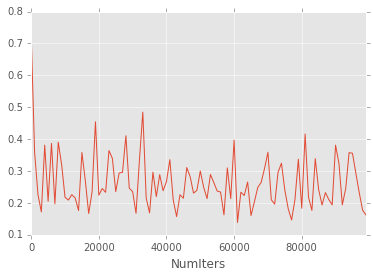

In [18]:
logg['loss'].plot()